# Proyek Analisis Data: Air Quality di Shunyi
- Nama: Syamsiah
- Email: syamsiahs192@gmail.com
- Id Dicoding: shssshh

#1. Menentukan Pertanyaan Bisnis
1. Apakah ada bulan tertentu yang mengalami lonjakan konsentrasi PM2.5?
2. Apa saja faktor yang mempengaruhi lonjakan konsentrasi PM2.5?

#2. Data Wrangling

In [1]:
#Import Library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from scipy import stats
from scipy.stats import levene

In [2]:
#Data Gathering
#Load Dataset
file_path = '/content/dataset/PRSA_Data_Shunyi_20130301-20170228.csv'
data_df = pd.read_csv(file_path)
data_df.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1.0,0.0,3.0,6.0,3.0,8.0,300.0,44.0,-0.9,1025.8,-20.5,0.0,NW,9.3,Shunyi
1,2,2013,3,1.0,1.0,12.0,12.0,3.0,7.0,300.0,47.0,-1.1,1026.1,-21.3,0.0,NW,9.4,Shunyi
2,3,2013,3,1.0,2.0,14.0,14.0,NaN,7.0,200.0,22.0,-1.7,1026.2,-23.0,0.0,NW,8.6,Shunyi
3,4,2013,3,1.0,3.0,12.0,12.0,3.0,5.0,NaN,NaN,-2.1,1027.3,-23.3,0.0,NW,6.6,Shunyi
4,5,2013,3,1.0,4.0,12.0,12.0,3.0,NaN,200.0,11.0,-2.4,1027.7,-22.9,0.0,NW,4.5,Shunyi


In [3]:
#Initial Assesment
data_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13949 entries, 0 to 13948
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       13949 non-null  int64  
 1   year     13949 non-null  int64  
 2   month    13949 non-null  int64  
 3   day      13948 non-null  float64
 4   hour     13948 non-null  float64
 5   PM2.5    13534 non-null  float64
 6   PM10     13816 non-null  float64
 7   SO2      13336 non-null  float64
 8   NO2      13280 non-null  float64
 9   CO       12630 non-null  float64
 10  O3       13646 non-null  float64
 11  TEMP     13948 non-null  float64
 12  PRES     13948 non-null  float64
 13  DEWP     13945 non-null  float64
 14  RAIN     13948 non-null  float64
 15  wd       13947 non-null  object 
 16  WSPM     13948 non-null  float64
 17  station  13948 non-null  object 
dtypes: float64(13), int64(3), object(2)
memory usage: 1.9+ MB


In [4]:
#Looking for Missing Value and Duplicate
Missing_data = data_df.isna().mean()
Missing_data

,0
No,0.000000
year,0.000000
month,0.000000
day,0.000072
hour,0.000072
PM2.5,0.029751
PM10,0.009535
SO2,0.043946
NO2,0.047960
CO,0.094559


In [5]:
#Looking Duplicate
Duplicate_data = data_df.duplicated().sum()
Duplicate_data

0

In [6]:
#Data Cleaning of Missing
data_imputed = data_df.ffill()
data_imputed.isna().mean()

,0
No,0.0
year,0.0
month,0.0
day,0.0
hour,0.0
PM2.5,0.0
PM10,0.0
SO2,0.0
NO2,0.0
CO,0.0


In [7]:
# Data Summary
data_imputed.describe()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,13949.000000,13949.000000,13949.000000,13949.000000,13949.000000,13949.000000,13949.000000,13949.00000,13949.000000,13949.000000,13949.000000,13949.000000,13949.000000,13949.000000,13949.000000,13949.000000
mean,6975.000000,2013.473511,6.343179,15.692523,11.496523,81.419908,103.200824,16.85427,44.341326,1189.789877,61.834651,15.975604,1010.720059,5.380142,0.065725,1.783167
std,4026.873787,0.499316,3.009094,8.834221,6.923664,75.751234,86.032056,24.12307,30.822896,911.572682,58.817210,10.856222,9.625534,13.071528,0.838373,1.244911
min,1.000000,2013.000000,1.000000,1.000000,0.000000,3.000000,2.000000,0.28560,2.000000,100.000000,0.214200,-10.500000,988.000000,-30.400000,0.000000,0.000000
25%,3488.000000,2013.000000,4.000000,8.000000,5.000000,23.000000,37.000000,3.00000,20.119400,500.000000,14.000000,6.900000,1002.900000,-5.100000,0.000000,1.000000
50%,6975.000000,2013.000000,6.000000,16.000000,11.000000,61.000000,87.000000,6.00000,37.000000,1000.000000,49.000000,18.300000,1010.000000,7.700000,0.000000,1.500000
75%,10462.000000,2014.000000,9.000000,23.000000,17.000000,114.000000,145.000000,21.00000,61.000000,1600.000000,88.000000,24.500000,1017.900000,16.900000,0.000000,2.200000
max,13949.000000,2014.000000,12.000000,31.000000,23.000000,592.000000,764.000000,207.00000,204.000000,8700.000000,351.716400,40.600000,1035.900000,27.400000,37.300000,12.800000


#3. Exploratory Data Analysis(EDA)

Monthly Trends dilakukan untuk melihat tren rata-rata konsentrasi PM2.5 bulanan setiap tahunnya

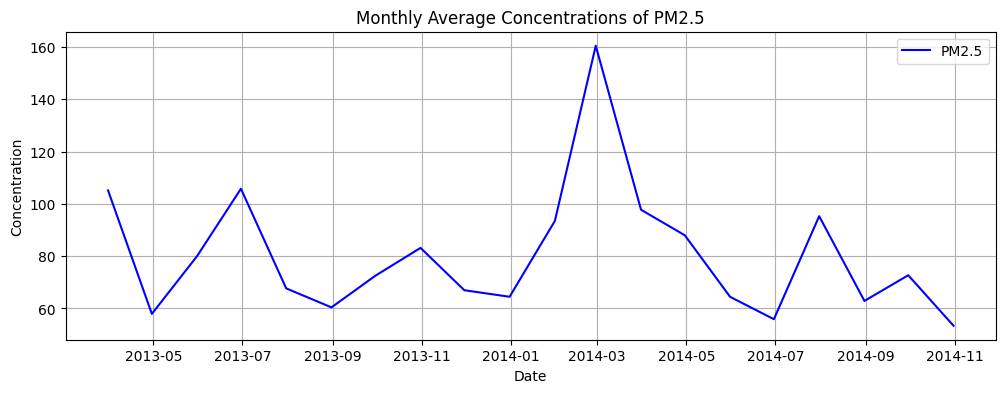

In [8]:
#Monthly trends
data_imputed['date'] = pd.to_datetime(data_imputed[['year', 'month', 'day', 'hour']])
data_time_series = data_imputed[['date', 'PM2.5']].set_index('date').resample('ME').mean()

plt.figure(figsize=(12, 4))
plt.plot(data_time_series.index, data_time_series['PM2.5'], label='PM2.5', color='blue')
plt.title('Monthly Average Concentrations of PM2.5')
plt.xlabel('Date')
plt.ylabel('Concentration')
plt.legend()
plt.grid()
plt.show()

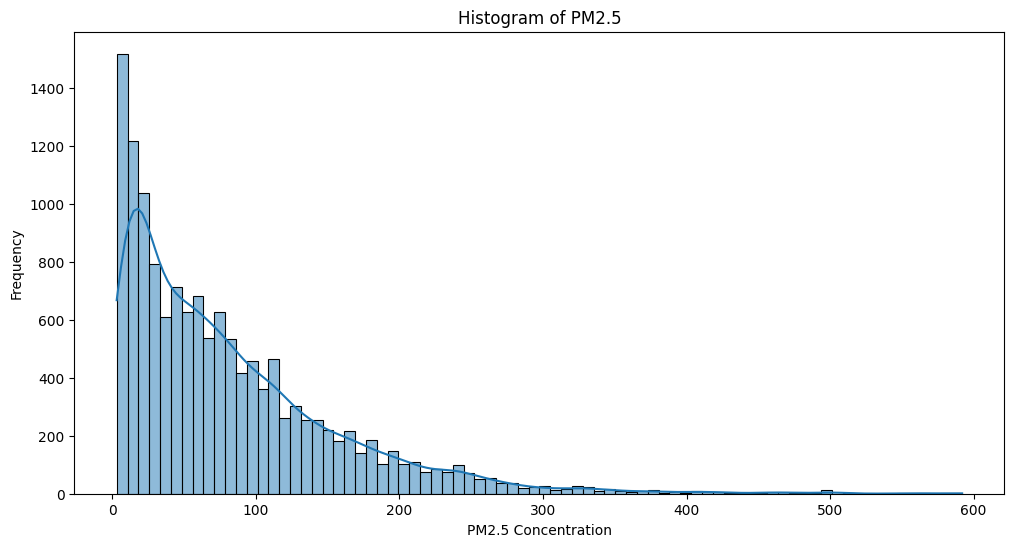

Levene’s Test Statistic: 114.70203339263657, p-value: 2.7319150986304664e-252


In [9]:
#Histogram for normality  test
plt.figure(figsize=(12, 6))
sns.histplot(data_imputed['PM2.5'], kde=True)
plt.title('Histogram of PM2.5')
plt.xlabel('PM2.5 Concentration')
plt.ylabel('Frequency')
plt.show()

# Variance Test
# Grouping PM2.5 by month
grouped_data = [group['PM2.5'].values for name, group in data_imputed.groupby('month')]

# Levene’s Test
levene_stat, levene_p = levene(*grouped_data)
print(f'Levene’s Test Statistic: {levene_stat}, p-value: {levene_p}')

ANOVA F-statistic: 106.34924002304079, p-value: 4.4841559798651495e-234
Significant differences exist between months.


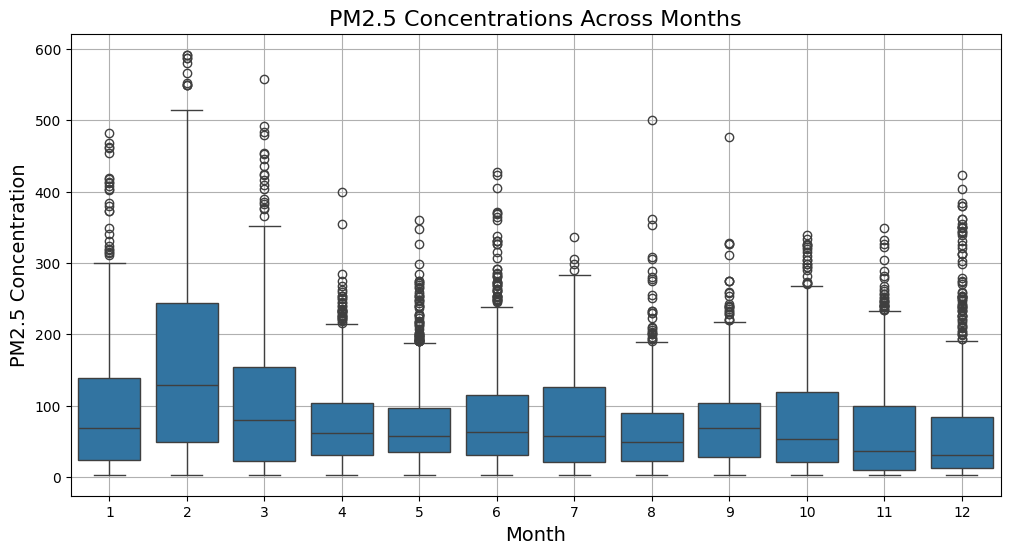

In [10]:
# Perform one-way ANOVA
f_statistic, p_value = stats.f_oneway(*grouped_data)

print(f"ANOVA F-statistic: {f_statistic}, p-value: {p_value}")

# Check if p-value is less than significance level (e.g., 0.05)
if p_value < 0.05:
    print("Significant differences exist between months.")
else:
    print("No significant differences between months.")

plt.figure(figsize=(12, 6))
sns.boxplot(x='month', y='PM2.5', data=data_imputed)
plt.title('PM2.5 Concentrations Across Months', fontsize=16)
plt.xlabel('Month', fontsize=14)
plt.ylabel('PM2.5 Concentration', fontsize=14)
plt.grid()
plt.show()

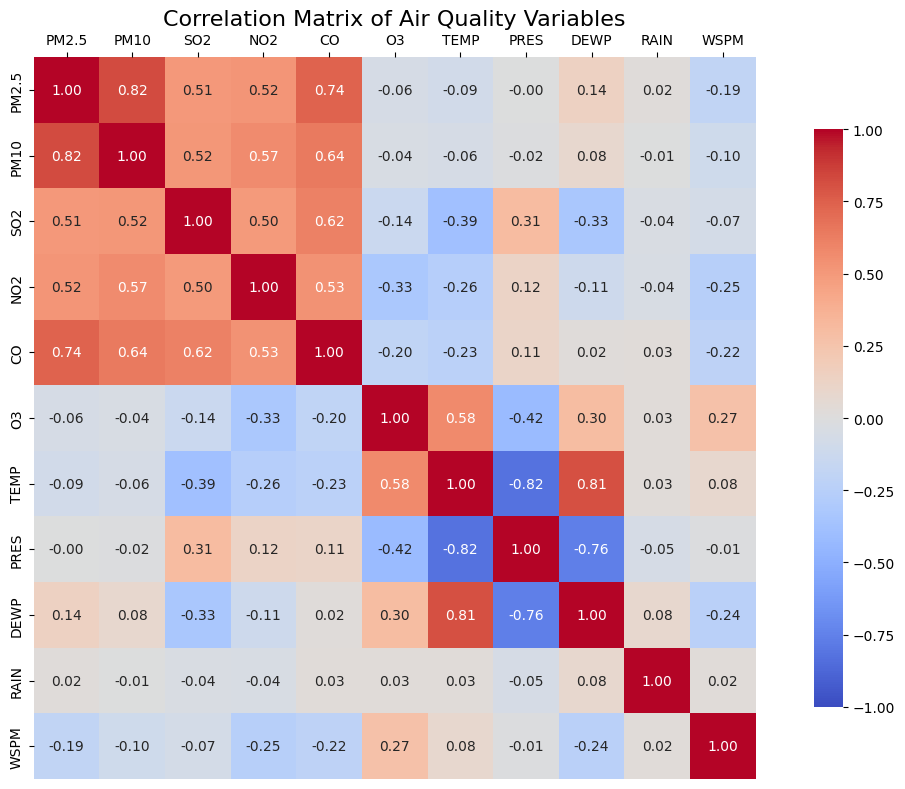

In [11]:
#Correlation Factor
correlation = data_imputed[['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3', 'TEMP', 'PRES', 'DEWP', 'RAIN', 'WSPM']].corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation, annot=True, fmt=".2f", cmap='coolwarm',
            vmin=-1, vmax=1, square=True, cbar_kws={"shrink": .8})
plt.title('Correlation Matrix of Air Quality Variables', fontsize=16)
plt.tight_layout()
plt.gca().xaxis.tick_top()
plt.gca().xaxis.set_label_position('top')
plt.show()

#4. Conclusion
1. Pada Bulan Desember-Februari, mengalami kenaikan konsentrasi PM2.5
2. Beberapa faktor yang yang mempengaruhi lonjakan konsentrasi PM2.5 adalah PM10 dan gas polutan lainnya(SO2, NO2, CO dan O3). Selain itu, DEWP(*Dew Point Temperature*) juga memiliki pengaruh terhadap pembentukan PM2.5 karena adanya kenaikan kadar kelembaban di atmosfir yang mempengaruhi pembentukan partikel.